In [3]:
import pandas as pd
file_path = "E:/dasktop/Uchicago/DEP/final/NYCtem.csv"
data = pd.read_csv(file_path)

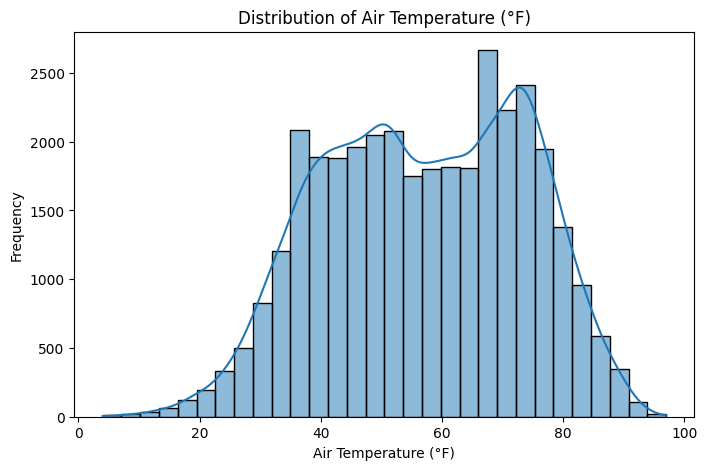

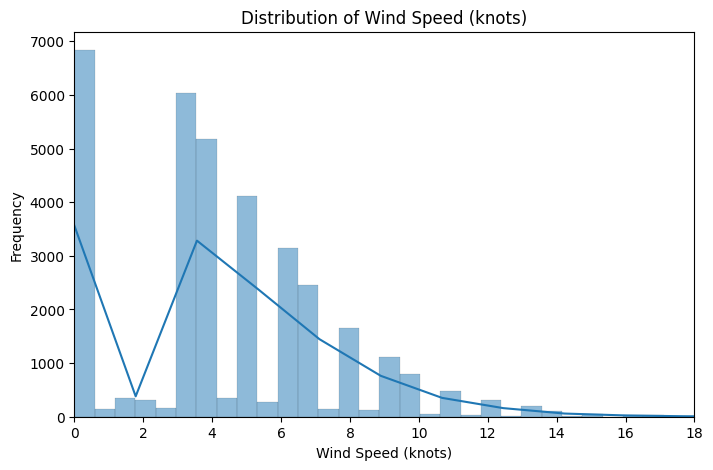

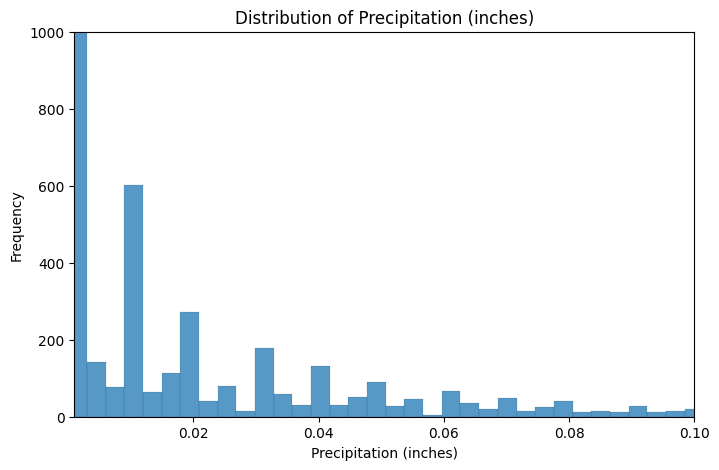

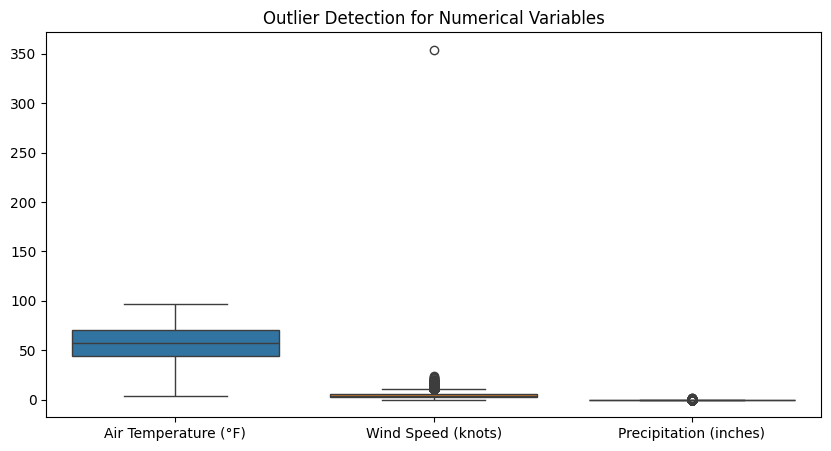

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Missing Data Analysis
missing_data = data.isnull().mean() * 100

# 2. Descriptive Statistics
desc_stats = data.describe()

# 3. Temporal Trends
# Group by year and month to get average values
temporal_trends = data.groupby(['year', 'month']).mean()[['Air Temperature (°F)', 'Wind Speed (knots)', 'Precipitation (inches)']].reset_index()

# 4. Correlation Analysis
correlation_matrix = data.corr()

# 5. Distribution Analysis (Temperature)
plt.figure(figsize=(8, 5))
sns.histplot(data['Air Temperature (°F)'], kde=True, bins=30)
plt.title('Distribution of Air Temperature (°F)')
plt.xlabel('Air Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# 5. Distribution Analysis (Wind Speed)
plt.figure(figsize=(8, 5))
sns.histplot(data['Wind Speed (knots)'], kde=True, bins=600)
plt.title('Distribution of Wind Speed (knots)')
plt.xlabel('Wind Speed (knots)')
plt.ylabel('Frequency')
plt.xlim(0,18)
plt.show()

# 5. Distribution Analysis (Precipitation)
plt.figure(figsize=(8, 5))
sns.histplot(data['Precipitation (inches)'], bins=600)
plt.title('Distribution of Precipitation (inches)')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.xlim(0.001,0.1)
plt.ylim(0,1000)
plt.show()

# 6. Outlier Detection (Boxplots)
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Air Temperature (°F)', 'Wind Speed (knots)', 'Precipitation (inches)']])
plt.title('Outlier Detection for Numerical Variables')
plt.show()


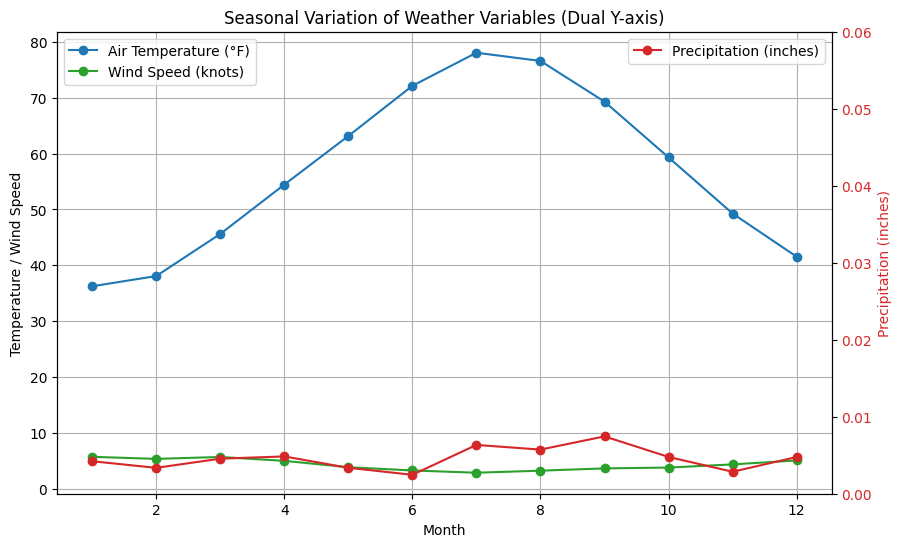

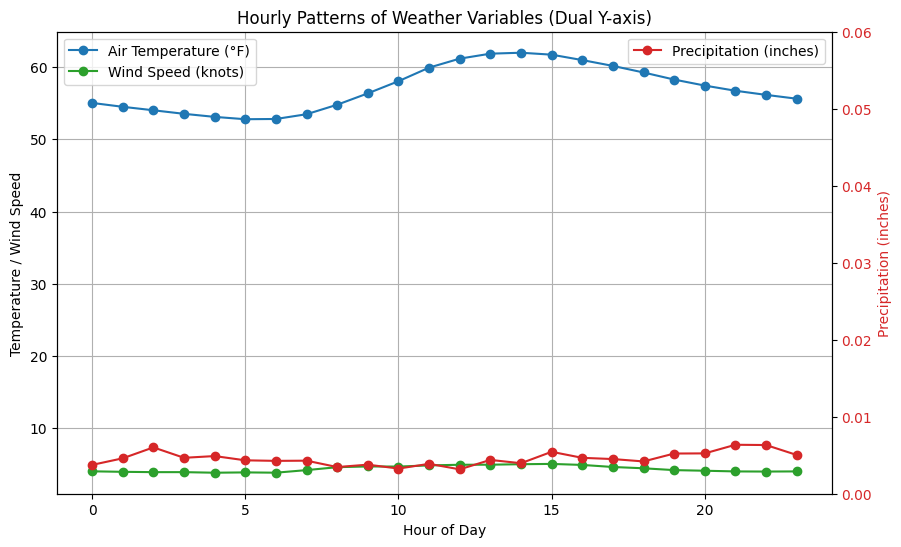

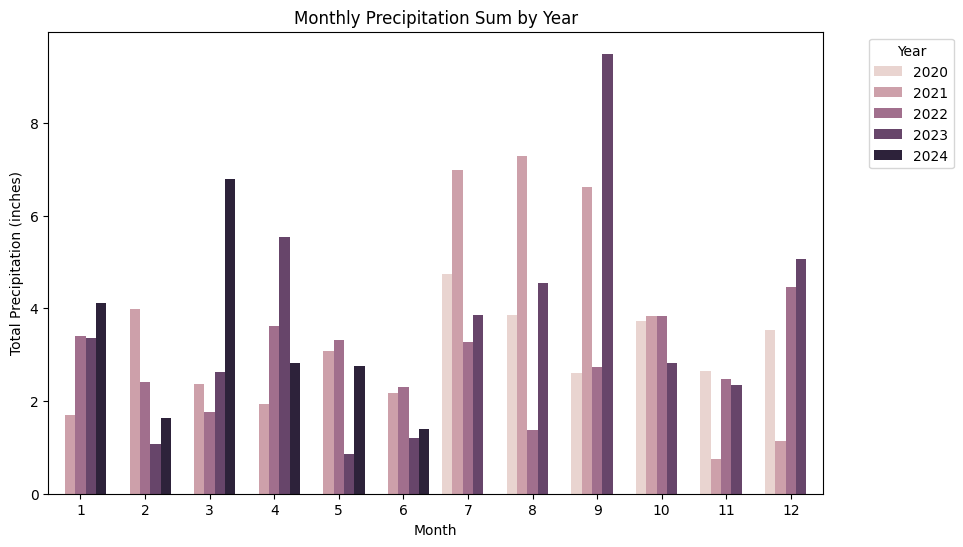

In [21]:
seasonal_variation = data.groupby('month').mean()[['Air Temperature (°F)', 'Wind Speed (knots)', 'Precipitation (inches)']].reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Temperature and Wind Speed on left y-axis
ax1.plot(seasonal_variation['month'], seasonal_variation['Air Temperature (°F)'], marker='o', label='Air Temperature (°F)', color='tab:blue')
ax1.plot(seasonal_variation['month'], seasonal_variation['Wind Speed (knots)'], marker='o', label='Wind Speed (knots)', color='tab:green')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature / Wind Speed', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Precipitation on right y-axis
ax2 = ax1.twinx()
ax2.plot(seasonal_variation['month'], seasonal_variation['Precipitation (inches)'], marker='o', label='Precipitation (inches)', color='tab:red')
ax2.set_ylabel('Precipitation (inches)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 0.06)
ax2.legend(loc='upper right')

plt.title('Seasonal Variation of Weather Variables (Dual Y-axis)')
plt.show()

hourly_patterns = data.groupby('hour').mean()[['Air Temperature (°F)', 'Wind Speed (knots)', 'Precipitation (inches)']].reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Temperature and Wind Speed on left y-axis
ax1.plot(hourly_patterns['hour'], hourly_patterns['Air Temperature (°F)'], marker='o', label='Air Temperature (°F)', color='tab:blue')
ax1.plot(hourly_patterns['hour'], hourly_patterns['Wind Speed (knots)'], marker='o', label='Wind Speed (knots)', color='tab:green')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Temperature / Wind Speed', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Precipitation on right y-axis
ax2 = ax1.twinx()
ax2.plot(hourly_patterns['hour'], hourly_patterns['Precipitation (inches)'], marker='o', label='Precipitation (inches)', color='tab:red')
ax2.set_ylabel('Precipitation (inches)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 0.06)
ax2.legend(loc='upper right')

plt.title('Hourly Patterns of Weather Variables (Dual Y-axis)')
plt.show()

monthly_precipitation = data.groupby(['year', 'month']).sum()['Precipitation (inches)'].reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_precipitation, x='month', y='Precipitation (inches)', hue='year', dodge=True)
plt.title('Monthly Precipitation Sum by Year')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()